# Constant Entropy Model Calculations and Visualizations
This Jupyter Notebook implements key formulas from the 'Constant Entropy: A Unified Perspective on Thermodynamic and Computational Systems' document (V9). It focuses on thermodynamic processes like ideal gas expansion and methane combustion, visualizing energy usage, entropy accumulation, and comparing standard calculations with the Constant Entropy model's interpretations.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## 1. Ideal Gas Expansion Calculations
We'll calculate entropy changes for reversible adiabatic, irreversible adiabatic, and free expansion of an ideal gas, comparing standard thermodynamics with the Constant Entropy model.

In [5]:
def ideal_gas_entropy_change(n, Cv, T1, T2, V1, V2, R=8.314):
    """Calculate entropy change for an ideal gas in a closed system.
    Parameters:
    - n: Moles of gas (mol)
    - Cv: Molar heat capacity at constant volume (J/(mol·K))
    - T1, T2: Initial and final temperatures (K)
    - V1, V2: Initial and final volumes (m^3)
    - R: Gas constant (8.314 J/(mol·K))
    Returns:
    - delta_S: Entropy change (J/K)
    """
    delta_S = n * Cv * math.log(T2 / T1) + n * R * math.log(V2 / V1)
    return delta_S
   
# Constants for 1 mole of monatomic ideal gas
n = 1  # 1 mole
Cv = 1.5 * 8.314  # Monatomic gas, Cv = (3/2)R
T1 = 300  # Initial temperature (K)
V1 = 1  # Initial volume (m^3)
V2 = 2  # Final volume (m^3)
R = 8.314  # Gas constant (J/(mol·K))

# Reversible adiabatic expansion
gamma = 5/3  # Gamma for monatomic gas
T2_rev = T1 * (V1 / V2) ** (gamma - 1)  # Adiabatic condition
W_rev = n * Cv * (T1 - T2_rev)  # Work done
delta_S_rev = ideal_gas_entropy_change(n, Cv, T1, T2_rev, V1, V2)

# Irreversible adiabatic expansion (against constant external pressure)
P1 = (n * R * T1) / V1  # Initial pressure
P_ext = 0.5 * P1  # External pressure
W_irr = P_ext * (V2 - V1)  # Work done
T2_irr = T1 - (W_irr / (n * Cv))  # Final temperature
delta_S_irr = ideal_gas_entropy_change(n, Cv, T1, T2_irr, V1, V2)

# Free expansion
T2_free = T1  # No temperature change in free expansion
W_free = 0  # No work done
delta_S_free = ideal_gas_entropy_change(n, Cv, T1, T2_free, V1, V2)

# Print results
print(f'Reversible Adiabatic Expansion:\n Work Done: {W_rev:.2f} J\n Entropy Change: {delta_S_rev:.2f} J/K')
print(f'Irreversible Adiabatic Expansion:\n Work Done: {W_irr:.2f} J\n Entropy Change: {delta_S_irr:.2f} J/K')
print(f'Free Expansion:\n Work Done: {W_free:.2f} J\n Entropy Change: {delta_S_free:.2f} J/K')

Reversible Adiabatic Expansion:
 Work Done: 1384.43 J
 Entropy Change: 0.00 J/K
Irreversible Adiabatic Expansion:
 Work Done: 1247.10 J
 Entropy Change: 0.71 J/K
Free Expansion:
 Work Done: 0.00 J
 Entropy Change: 5.76 J/K


## 2. Visualization of Energy Usage and Entropy Accumulation
Let's plot the work done (energy usage) and entropy changes for the three expansion processes.

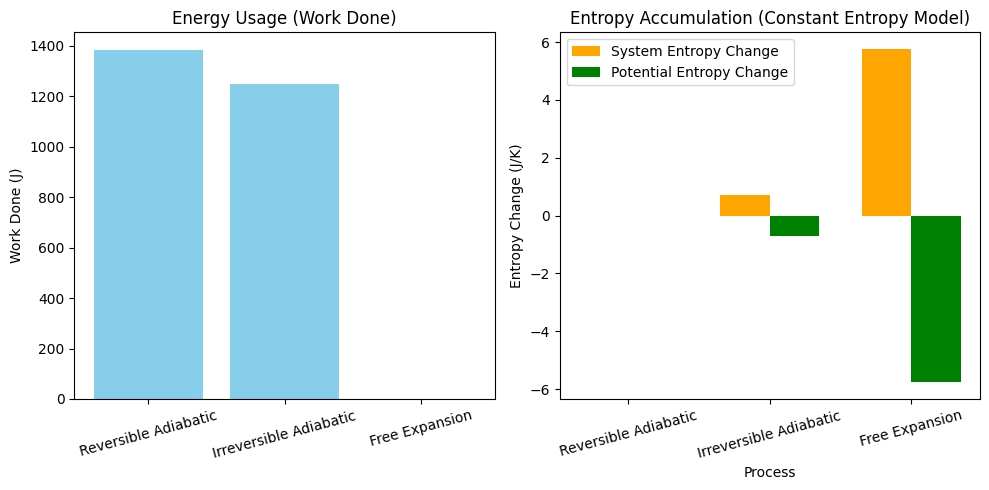

In [6]:
# Data for plotting
processes = ['Reversible Adiabatic', 'Irreversible Adiabatic', 'Free Expansion']
work_done = [W_rev, W_irr, W_free]
entropy_changes = [delta_S_rev, delta_S_irr, delta_S_free]
potential_entropy = [-delta_S_rev, -delta_S_irr, -delta_S_free]  # Constant Entropy model interpretation

# Plot Work Done
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(processes, work_done, color='skyblue')
plt.title('Energy Usage (Work Done)')
plt.ylabel('Work Done (J)')
plt.xticks(rotation=15)

# Plot Entropy Changes
plt.subplot(1, 2, 2)
bar_width = 0.35
x = np.arange(len(processes))
plt.bar(x - bar_width/2, entropy_changes, bar_width, label='System Entropy Change', color='orange')
plt.bar(x + bar_width/2, potential_entropy, bar_width, label='Potential Entropy Change', color='green')
plt.xlabel('Process')
plt.ylabel('Entropy Change (J/K)')
plt.title('Entropy Accumulation (Constant Entropy Model)')
plt.xticks(x, processes, rotation=15)
plt.legend()

plt.tight_layout()
plt.show()

## 3. Methane Combustion Calculations
Now, we'll calculate energy and entropy changes for methane combustion under reversible and irreversible conditions.

In [7]:
# Constants for methane combustion at 298 K, 1 atm
delta_H = -890.3 * 1000  # Enthalpy change (J/mol)
delta_S_system = -242.8  # System entropy change (J/(mol·K))
T0 = 298  # Environmental temperature (K)

# Reversible combustion (maximum work)
delta_G = delta_H - T0 * delta_S_system  # Gibbs free energy change
W_max = -delta_G  # Maximum work
delta_S_surr_rev = -delta_H / T0  # Surroundings entropy change
delta_S_total_rev = delta_S_system + delta_S_surr_rev  # Total entropy change

# Irreversible combustion (all energy as heat)
W_irr_comb = 0  # No work done
Q_irr = delta_H  # All energy released as heat
delta_S_surr_irr = -Q_irr / T0  # Surroundings entropy change
delta_S_total_irr = delta_S_system + delta_S_surr_irr  # Total entropy change

# Constant Entropy model interpretation
delta_H_potential_rev = -delta_S_system  # Potential entropy change

# Print results
print(f'Reversible Methane Combustion:\n Maximum Work: {W_max/1000:.1f} kJ/mol\n System Entropy Change: {delta_S_system:.1f} J/(mol·K)\n Surroundings Entropy Change: {delta_S_surr_rev:.1f} J/(mol·K)\n Total Entropy Change: {delta_S_total_rev:.1f} J/(mol·K)')
print(f'Irreversible Methane Combustion:\n Work Done: {W_irr_comb/1000:.1f} kJ/mol\n System Entropy Change: {delta_S_system:.1f} J/(mol·K)\n Surroundings Entropy Change: {delta_S_surr_irr:.1f} J/(mol·K)\n Total Entropy Change: {delta_S_total_irr:.1f} J/(mol·K)')
print(f'Constant Entropy Model (Reversible):\n System Entropy Change: {delta_S_system:.1f} J/(mol·K)\n Potential Entropy Change: {delta_H_potential_rev:.1f} J/(mol·K)\n Total Entropy (System + Potential): {delta_S_system + delta_H_potential_rev:.1f} J/(mol·K)')

Reversible Methane Combustion:
 Maximum Work: 817.9 kJ/mol
 System Entropy Change: -242.8 J/(mol·K)
 Surroundings Entropy Change: 2987.6 J/(mol·K)
 Total Entropy Change: 2744.8 J/(mol·K)
Irreversible Methane Combustion:
 Work Done: 0.0 kJ/mol
 System Entropy Change: -242.8 J/(mol·K)
 Surroundings Entropy Change: 2987.6 J/(mol·K)
 Total Entropy Change: 2744.8 J/(mol·K)
Constant Entropy Model (Reversible):
 System Entropy Change: -242.8 J/(mol·K)
 Potential Entropy Change: 242.8 J/(mol·K)
 Total Entropy (System + Potential): 0.0 J/(mol·K)


## 4. Visualization of Methane Combustion
Let's visualize the energy usage and entropy changes for methane combustion.

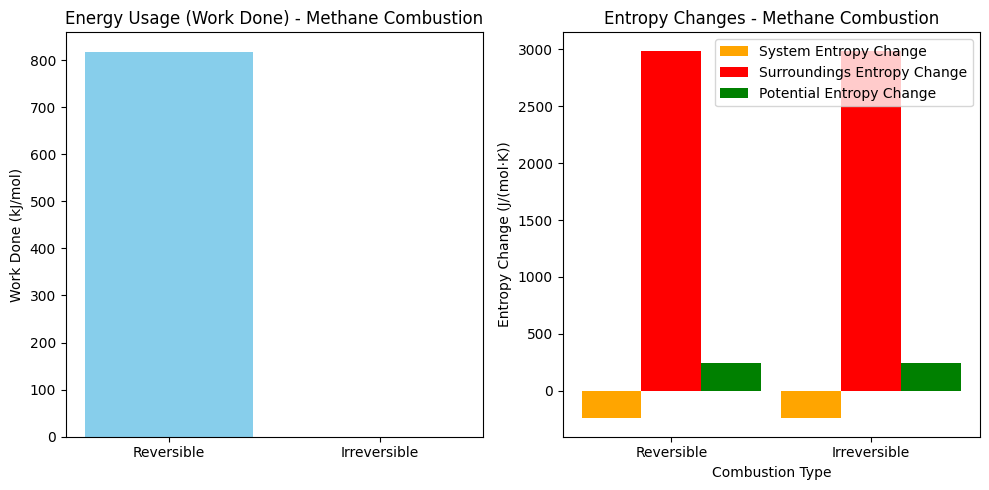

In [8]:
# Data for plotting
combustion_types = ['Reversible', 'Irreversible']
work_done_comb = [W_max/1000, W_irr_comb/1000]
entropy_system = [delta_S_system, delta_S_system]
entropy_surr = [delta_S_surr_rev, delta_S_surr_irr]
potential_entropy_comb = [delta_H_potential_rev, delta_H_potential_rev]

# Plot Work Done
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(combustion_types, work_done_comb, color='skyblue')
plt.title('Energy Usage (Work Done) - Methane Combustion')
plt.ylabel('Work Done (kJ/mol)')

# Plot Entropy Changes
plt.subplot(1, 2, 2)
bar_width = 0.3
x = np.arange(len(combustion_types))
plt.bar(x - bar_width, entropy_system, bar_width, label='System Entropy Change', color='orange')
plt.bar(x, entropy_surr, bar_width, label='Surroundings Entropy Change', color='red')
plt.bar(x + bar_width, potential_entropy_comb, bar_width, label='Potential Entropy Change', color='green')
plt.xlabel('Combustion Type')
plt.ylabel('Entropy Change (J/(mol·K))')
plt.title('Entropy Changes - Methane Combustion')
plt.xticks(x, combustion_types)
plt.legend()

plt.tight_layout()
plt.show()

## 5. Comparison and Discussion
- **Energy Usage**: The graphs show that reversible processes (both expansion and combustion) maximize work output, while irreversible processes and free expansion result in less or no work, highlighting energy efficiency differences.
- **Entropy Accumulation**: In standard thermodynamics, system entropy changes depend on the process, with total entropy (system + surroundings) often increasing in irreversible processes. The Constant Entropy model reinterprets system entropy changes as balanced by potential entropy, maintaining a constant total entropy within the system's conceptual framework.
- **Constant Entropy Model Insight**: This model provides a unified perspective by showing that entropy shifts (e.g., increases in system entropy balanced by decreases in potential entropy) conserve total entropy, offering a new lens to analyze efficiency and disorder across thermodynamic and computational systems.